In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
data= keras.datasets.fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels)= data.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
print(train_labels[23])

8


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
train_images.shape

(60000, 28, 28)

In [23]:
len(train_labels)


60000

In [24]:
test_images.shape


(10000, 28, 28)

In [27]:
print(train_images[78])

[[  0   0   0   0   0   0   0   0   0   0 122 101  73  59  39 108  89  91
   83   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3 215 232 236 223 171 254 233 170
  147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  87 232 176 183 209 240 222 184 187
  171  14   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 116 198 170 168 186 198 167 168 184
  191  40   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 144 178 164 170 198 164 167 182 160
  178  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 165 180 158 160 184 223 192 168 167
  180 109   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 163 176 160 166 178 218 190 176 180
  138  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 156 166 152 157 188 165 218 165 179
   84  43   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 145 166 141 164 216  71 24

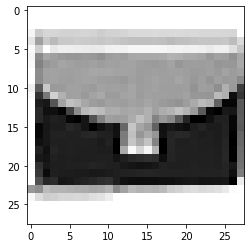

In [72]:
plt.imshow(test_images[78], cmap=plt.cm.binary)
plt.show()


In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [58]:
print(train_images[78])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.47843137 0.39607843
  0.28627451 0.23137255 0.15294118 0.42352941 0.34901961 0.35686275
  0.3254902  0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01176471 0.84313725 0.90980392
  0.9254902  0.8745098  0.67058824 0.99607843 0.91372549 0.66666667
  0.57647059 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.34117647 0.90980392 0.69019608
  0.71764706 0.81960784 0.94117647 0.87058824 0.72156863 0.73333333
  0.67058824 0.05490196 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [59]:
model=keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')])

In [60]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


In [61]:
#train model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5009 - accuracy: 0.8223
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3425 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3184 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8910


In [62]:
test_loss, test_acc= model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8710


In [63]:
print("Tested Accuracy:",test_acc)

Tested Accuracy: 0.8709999918937683


In [70]:
prediction=model.predict(test_images)
print(class_names[np.argmax(prediction[78])])

Bag


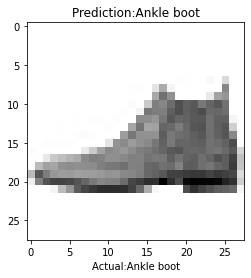

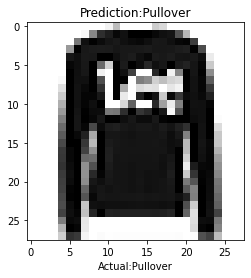

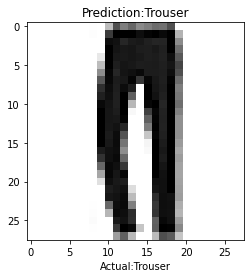

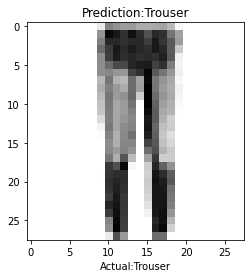

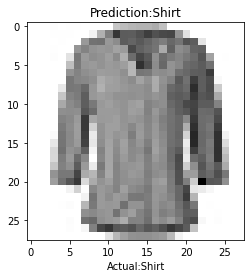

In [78]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual:"+class_names[test_labels[i]])
    plt.title("Prediction:"+class_names[np.argmax(prediction[i])])
    plt.show()